# TRATANDO DADOS DO DATASET PRINCIPAL DAS EMPRESAS

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from unidecode import unidecode
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import scale
seaborn.set()
from kmodes.kmodes import KModes

In [3]:
#lendo o arquivo csv principal
empresas = pd.read_csv('empresas-dados - PRINCIPAL.csv')

In [4]:
#Excluindo colunas desnecessárias e com muitos dados ausentes e quebrados
empresas.drop(['RAZÃO SOCIAL', 'FATURAMENTO', 'CAPITAL SOCIAL', 'QUANT. FUNC.', 'DATA ABERT.','SÓCIOS','TELEFONE','EMAIL','CEP','LOGRADOURO','NÚMERO', 'LOCATION'], axis=1, inplace=True)

In [5]:
#verificando a exclusão das colunas
empresas.head(3)

,NOME FANTASIA,CNPJ,TIPO,ATIVIDADE,NATUREZA JURÍDICA,PORTE,CIDADE,ESTADO,BAIRRO,Lat,Lng,km.res$cluster
0,Alemao Tur Viagens E Turismo Ltda - Epp,03.558.344/0001-09,SERVIÇOS,Agencias de viagens e serviços aos transportes,Sociedade Empresária Limitada,Pequeno porte,Joao Pessoa,PB,Dos Novais,-7.1554721,-34.9008742,4
1,Logica Transportes Ltda - Epp,00.934.152/0001-61,SERVIÇOS,Agencias de viagens e serviços aos transportes,Sociedade Empresária Limitada,Pequeno porte,Joao Pessoa,PB,Pedro Gondim,-7.1196999,-34.8471031,4
2,Classic Viagens E Turismo - Eireli - Epp,00.448.994/0001-03,SERVIÇOS,Agencias de viagens e serviços aos transportes,Empresa Individual De Responsabilidade Limitad...,Pequeno porte,Joao Pessoa,PB,Dos Estados,-7.1196999,-34.8471031,4


In [6]:
#alterando os espaços em branco no nome das colunas para _
empresas.columns = empresas.columns.str.replace(' ','_')

In [7]:
#verificando a quantidade de linhas e colunas
empresas.shape

(2145, 12)

In [8]:
#verificando linhas e dados duplicados
empresas.describe(include='all')
#Neste caso, há dados duplicados em NOME_FANTASIA e CNPJ. Também há erros de digitação na NATUREZA_JURÍDICA, PORTE, CIDADE e BAIRRO.

,NOME_FANTASIA,CNPJ,TIPO,ATIVIDADE,NATUREZA_JURÍDICA,PORTE,CIDADE,ESTADO,BAIRRO,Lat,Lng,km.res$cluster
count,2145,2141,2145,2145,1839,2145,2145,2145,2145,2145,2145,2145.000000
unique,2075,2076,3,39,15,8,155,1,391,1133,1134,NaN
top,Subway,11.877.483/0001-23,COMÉRCIO,Comércio Atacadista,Sociedade Empresária Limitada,Pequeno Porte,Joao Pessoa,PB,Centro,-7.1196999,-34.8471031,NaN
freq,4,2,864,304,774,1479,511,2145,624,36,36,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.399534
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.695333
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


In [9]:
#aqui verificamos que há 68 registros de CNPJs duplicados
empresas.duplicated(['CNPJ']).sum()

68

In [ ]:
#Mas, ao analisar melhor estes casos, percebe-se que são CNPJs iguais, mas com atividades e localidades diferentes
#Com o código abaixo, vemos a quantidade correta de linhas duplicadas 
empresas.duplicated(['CNPJ', 'NOME_FANTASIA', 'BAIRRO', 'ATIVIDADE']).sum()

In [11]:
#Excluindo as linhas duplicadas e mantendo o primeiro caso no dataset
empresas.drop_duplicates(subset=['CNPJ','NOME_FANTASIA', 'BAIRRO', 'ATIVIDADE'], keep='first', inplace=True)

In [12]:
#verificando as alterações
empresas.describe(include='all')

,NOME_FANTASIA,CNPJ,TIPO,ATIVIDADE,NATUREZA_JURÍDICA,PORTE,CIDADE,ESTADO,BAIRRO,Lat,Lng,km.res$cluster
count,2137,2133,2137,2137,1832,2137,2137,2137,2137,2137,2137,2137.000000
unique,2075,2076,3,39,15,8,155,1,391,1133,1134,NaN
top,Subway,11.723.281/0001-27,COMÉRCIO,Comércio varejista,Sociedade Empresária Limitada,Pequeno Porte,Joao Pessoa,PB,Centro,-7.1196999,-34.8471031,NaN
freq,4,2,859,303,773,1472,509,2137,622,36,36,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.399626
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.694656
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


In [ ]:
#Listando a quantidade de empresas por atividade e Tipo
pd.crosstab(empresas.ATIVIDADE, empresas.TIPO)
#Nenhum erro encontrado

In [ ]:
#verificando erros na natureza jurídica
pd.crosstab(empresas.NATUREZA_JURÍDICA, empresas.TIPO)
#Como há muitos e erros, mais de 600 linhas faltando dados e a coluna não é relevante para o nosso objetivo, vamos excluir esta coluna.

In [13]:
#Excluindo coluna defeituosa
empresas.drop(['NATUREZA_JURÍDICA'], axis=1, inplace=True)

In [ ]:
#Agora vamos analisar a coluna PORTE
pd.crosstab(empresas.PORTE, empresas.TIPO)

In [14]:
#Como há erros de digitação, vamos alterar isso e deixar somente 3 tipos de porte
#Antes disso, vamos verificar a quantidade exata de cada erro
empresas.PORTE.value_counts()

Pequeno Porte     1472
Pequeno porte      391
 Pequeno porte     247
Médio porte         11
Grande               7
Médio Porte          6
Grande porte         2
Grande Porte         1
Name: PORTE, dtype: int64

In [16]:
#Função para iterar o dataframe e corrigir os nomes do PORTE da empresa
def iterarPorte(df):
    for indice,x in df.iterrows():
        if 'queno' in x.PORTE:
            df.loc[indice,'PORTE'] = 'pequeno_porte'
        elif 'Médio' in x.PORTE:
            df.loc[indice,'PORTE'] = 'medio_porte'
        else:
            df.loc[indice,'PORTE'] = 'grande_porte'
            
    return df

In [17]:
#Atribuindo um novo dataframe para a correção do PORTE
empresasP = iterarPorte(empresas)

In [18]:
#Verificando a correção do PORTE
empresasP.PORTE.value_counts()

pequeno_porte    2110
medio_porte        17
grande_porte       10
Name: PORTE, dtype: int64

In [ ]:
#verificando erros nos nomes das cidades
pd.crosstab(empresas.CIDADE, empresas.TIPO)
#Há vários erros de digitação nos nomes das cidades

In [19]:
#Função para alterar o nome da cidade para UPPER
def tudoUpper(df):
    for indice, x in df.iterrows():
        df.loc[indice, 'CIDADE'] = x.CIDADE.upper()
        
    return df


#Função para alterar o nome da cidade para a escrita correta mas sem acentuação
def iterarCidade(string1,string2,df,cidade):
    for indice, x in df.iterrows():
        if string1 in x.CIDADE:
            df.loc[indice, 'CIDADE'] = cidade
            
            
        elif string2 in x.CIDADE:
            df.loc[indice, 'CIDADE'] = cidade
        
    return df


In [20]:
empresasUpper = tudoUpper(empresasP)
empresasUpper.head(3)

,NOME_FANTASIA,CNPJ,TIPO,ATIVIDADE,PORTE,CIDADE,ESTADO,BAIRRO,Lat,Lng,km.res$cluster
0,Alemao Tur Viagens E Turismo Ltda - Epp,03.558.344/0001-09,SERVIÇOS,Agencias de viagens e serviços aos transportes,pequeno_porte,JOAO PESSOA,PB,Dos Novais,-7.1554721,-34.9008742,4
1,Logica Transportes Ltda - Epp,00.934.152/0001-61,SERVIÇOS,Agencias de viagens e serviços aos transportes,pequeno_porte,JOAO PESSOA,PB,Pedro Gondim,-7.1196999,-34.8471031,4
2,Classic Viagens E Turismo - Eireli - Epp,00.448.994/0001-03,SERVIÇOS,Agencias de viagens e serviços aos transportes,pequeno_porte,JOAO PESSOA,PB,Dos Estados,-7.1196999,-34.8471031,4


In [21]:
#CHAMANDO A FUNÇÃO ITERARCIDADE PARA ALTERAR CADA CIDADE COM A GRAFIA INCORRETA

empresasCidade = iterarCidade('BAIA', 'TRAI', empresasUpper, 'BAIA DA TRAICAO')
empresasCidade = iterarCidade('CAAP', 'CAAPO', empresasCidade, 'CAAPORA')
empresasCidade = iterarCidade('CATOL', 'CATOL', empresasCidade, 'CATOLE DA ROCHA')
empresasCidade = iterarCidade('JOAO', 'PESSO', empresasCidade, 'JOAO PESSOA')
empresasCidade = iterarCidade('PEDRA', 'PEDRAS', empresasCidade, 'PEDRAS DE FOGO')
empresasCidade = iterarCidade('BOQUE', 'BOQUE', empresasCidade, 'BOQUEIRAO')
empresasCidade = iterarCidade('BREJO DA CRUZ', 'BELEM DO BREJO DO CRUZ', empresasCidade, 'BREJO DO CRUZ')
empresasCidade = iterarCidade('SÃO MIGUEL', 'SAO MIGUEL', empresasCidade, 'SAO MIGUEL DE ITAIPU')
empresasCidade = iterarCidade('UIRAUNA', 'UIRAÚNA', empresasCidade, 'UIRAUNA')
empresasCidade = iterarCidade('SAPE', 'SAPÉ', empresasCidade, 'SAPE')

In [ ]:
pd.crosstab(empresasCidade.CIDADE, empresas.TIPO)

In [ ]:
pd.crosstab(empresasCidade.BAIRRO, empresas.TIPO)

In [22]:
#Os bairros também estão com erros de grafia, como são muitos bairros para alterar, vamos deixar todos UPPER e fazer a análise dos clusters com os bairros e dps sem os bairros

#Função para alterar o nome do bairro para UPPER
def tudoUpperBairro(df):
    for indice, x in df.iterrows():
        df.loc[indice, 'BAIRRO'] = x.BAIRRO.upper()
        
    return df

empresasBairro = tudoUpperBairro(empresasCidade)
empresasBairro.head(2)

,NOME_FANTASIA,CNPJ,TIPO,ATIVIDADE,PORTE,CIDADE,ESTADO,BAIRRO,Lat,Lng,km.res$cluster
0,Alemao Tur Viagens E Turismo Ltda - Epp,03.558.344/0001-09,SERVIÇOS,Agencias de viagens e serviços aos transportes,pequeno_porte,JOAO PESSOA,PB,DOS NOVAIS,-7.1554721,-34.9008742,4
1,Logica Transportes Ltda - Epp,00.934.152/0001-61,SERVIÇOS,Agencias de viagens e serviços aos transportes,pequeno_porte,JOAO PESSOA,PB,PEDRO GONDIM,-7.1196999,-34.8471031,4


In [52]:
empresasCluster = empresasBairro.drop(['km.res$cluster', 'NOME_FANTASIA','CNPJ', 'Lat', 'Lng'], axis=1)
dataCalk = pd.read_csv('latLng.csv')
dataCalk.head(2
             )

,Unnamed: 0,Lat,Lng
0,0,-71554721.0,-349008742.0
1,1,-71196999.0,-348471031.0


In [36]:
dataCalk.drop(['Unnamed: 0'], axis=1, inplace=True)

In [37]:
#Agora vamos calcular quantos clusters precisaremos determinar para um melhor cálculo do k-means
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1234)
    kmeans.fit(dataCalk)
    inertia.append((i,kmeans.inertia_,))

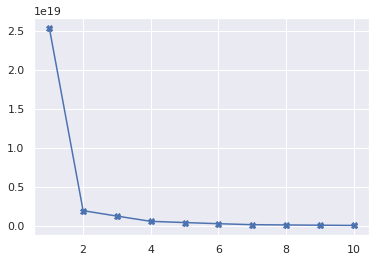

In [38]:
plt.plot([w[0] for w in inertia],[w[1] for w in inertia], marker="X")

In [56]:
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(empresasCluster)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 247, cost: 4516.0
Run 1, iteration: 2/100, moves: 0, cost: 4516.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 426, cost: 4965.0
Run 2, iteration: 2/100, moves: 52, cost: 4965.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 243, cost: 4576.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 166, cost: 4702.0
Run 4, iteration: 2/100, moves: 313, cost: 4578.0
Run 4, iteration: 3/100, moves: 37, cost: 4578.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 289, cost: 4801.0
Best run was number 1
[['SERVIÇOS' 'Serviço de alojamento e alimentação' 'pequeno_porte'
  'JOAO PESSOA' 'PB' 'CENTRO' '0']
 ['COMÉRCIO' 'Comércio varejis

In [57]:
empresasBairro['clustersKmodes'] = clusters

In [58]:
empresasBairro['clustersKmodes'].value_counts()

0    861
1    710
2    388
3    178
Name: clustersKmodes, dtype: int64